In [1]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display

    import matplotlib.pyplot as mplt
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    import matplotlib.ticker as ticker
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


In [3]:
#######################################################
#### GUI 

edt_filename = widgets.Text(description = 'File name', value='Exp1_v3')
btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux
    file_name = "\\"
    file_name = file_name + edt_filename.value 
    
    try: 
        with h5py.File(file_name, mode='r') as hdf:
            
            print("File found and content loaded into memory")
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            #total_t = T.get('TOTAL_T')[()]
            #intervals = T.get('INTERVALS')[()]
            #dt = T.get("DT")[()]
            
            total_t = round(T.get('EXTENDED_TOTAL_T')[()])-1
            intervals = T.get('EXTENDED_INTERVALS')[()] 
            dt = T.get("EXTENDED_DT")[()]
            #total_t = T.get('EXTENDED_TOTAL_T')[()]
            #intervals = T.get('EXTENDED_INTERVALS')[()]
            #dt = T.get("EXTENDED_DT")[()]
            total_steps = total_t /dt          
            #interval_step = total_steps / intervals
            interval_step = 40000
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            
            master_arr = []
            t_arr =[]
            
            
            
            
            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)
               
                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])
                    
                    data_arr_2.append(data_arr)
            
                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         
                
                master_arr.append(data_arr_2)
                t_arr_bool = False
                
            
            #df_start['radius'] = 
            
            E = hdf.get('ELECTRODIFFUSION')
            E_group_arr = list(E.keys())
            ED_master_arr = []            
            
            ##### LOADING ELECTRODIFFUSION DATA
            for x in range(len(E_group_arr)): # Looping through the electrodiffusion groups on the file
                
                E_group = E.get(E_group_arr[x])
                
                ED_data_arr =[] #stores the electrodiffusion data for a group
                
                for y in range(len(list(E_group.keys()))-1): # Looping through all the datasets of the group
                    
                    dataset = E_group.get(str(interval_arr[y+1]))
                   
                    ED_data_arr_2 = [] #stores the dataset values for one dataset
                    for z in range(len(list(dataset))): # Looping through the individual datasets to extract data
                        ED_data_arr_2.append(dataset[z])
                    
                    
                    ED_data_arr.append(ED_data_arr_2) 
                    
            
                ED_master_arr.append(ED_data_arr) #contains all the electrodiffusion data for all the groups (1st index is the group, 2nd index is the interval)
            
      

            
    except: 
        raise("File not found")
        raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value='Exp1_v3', description='File name')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

File found and content loaded into memory


# FIGURE 1A - elementary changes to conentration, charge and volume

['Comp9', 'Comp8', 'Comp7', 'Comp6', 'Comp5', 'Comp4', 'Comp3', 'Comp2', 'Comp1']
12499


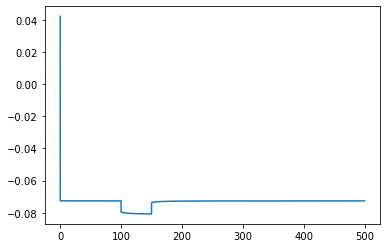

In [4]:
print(comp_names_arr[::-1])
vol_arr = [master_arr[-2][i][3] for i in range(len(t_arr))]
t2_arr = [t_arr[i] for i in range(len(t_arr))]
#mplt.plot(t2_arr,vol_arr)
v_arr = [master_arr[-2][i][-3] for i in range(len(t_arr))]
mplt.plot(t2_arr,v_arr)

print(intervals)

Button(button_style='info', description='Plot 1A', style=ButtonStyle())

Output()

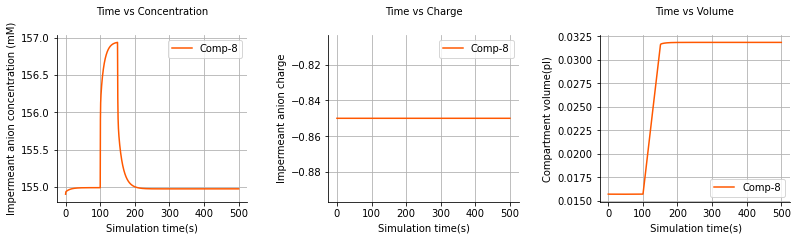

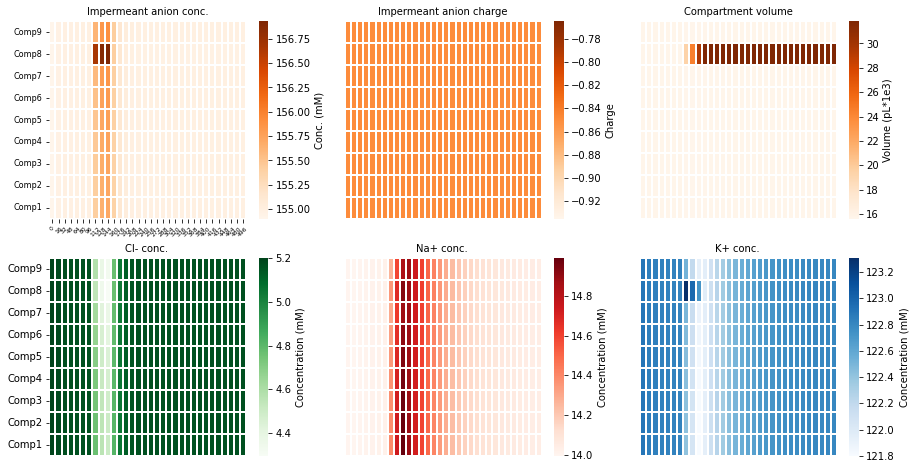

In [5]:
########################################
# GUI
########################################

btn_f1a = widgets.Button(description="Plot 1A", button_style='info')
output_f1a = widgets.Output()

display(btn_f1a, output_f1a)



########################################
# BACKEND
########################################
def btn_f1a_clicked(b):
    
    
    f1a, ((ax_x, ax_z, ax_vol)) = mplt.subplots(1,3, figsize=(12,4))
    f1a.tight_layout(pad=5)
    
    #mplt.subplots_adjust(left=0.1,
     #               bottom=0.1, 
     #               right=1, 
     #               top=0.9, 
     #               wspace=0.3, 
     #               hspace=0.1)

    #t2_arr = [round(t_arr[i]) for i in range(len(t_arr))]
    
    z_arr = [master_arr[-2][i][8] for i in range(len(t_arr))]
    vol_arr = [master_arr[-2][i][3]*1e12 for i in range(len(t_arr))]
    x_arr = [master_arr[-2][i][7]*1e3 for i in range(len(t_arr))]
    
    ax_z.plot(t2_arr[:], z_arr[:], color = "#FF5800", label="Comp-8")
    ax_z.set_xlabel("Simulation time(s)")
    ax_z.set_ylabel("Impermeant anion charge")
    ax_z.set_title("Time vs Charge",fontsize=10,pad=20)
    ax_z.grid()
    
    
    
    ax_vol.plot(t_arr, vol_arr, color = "#FF5800", label="Comp-8")
    ax_vol.set_xlabel(" Simulation time(s)")
    ax_vol.set_ylabel("Compartment volume(pl)")
    ax_vol.set_title("Time vs Volume",fontsize=10,pad=20)
    ax_vol.grid()
    
    ax_x.plot(t_arr[:], x_arr[:], color = "#FF5800", label="Comp-8")
    ax_x.set_xlabel("Simulation time(s)")
    ax_x.set_ylabel("Impermeant anion concentration (mM)")
    ax_x.set_title("Time vs Concentration",fontsize=10,pad=20)
    ax_x.grid()
    #ax_x.set_ylim(bottom=154.9, emit=True, auto=False)#, ymin=154.9, ymax=155.2)
   
  
    ax_z.legend()
    ax_vol.legend()
    ax_x.legend()
    sns.despine()
    
    
    f2a, ((ax_heatx, ax_heatz,ax_heatvol),(left_ax_lower, mid_ax_lower,right_ax_lower)) = mplt.subplots(2,3, figsize=(15,8))
    
    
    conc_arr, z_arr, vol_arr = [],[],[]
    bins = 25
    lower_right_arr, lower_mid_arr, lower_left_arr = [],[],[]
    
    for i in range(len(comp_names_arr)-1,-1,-1):

        temp_arr_conc = [master_arr[i][j][7] *1e3 for j in range(len(master_arr[0]))] 
        temp_arr_conc = temp_arr_conc[::400]
        conc_arr.append(temp_arr_conc)
        
        temp_arr_z = [master_arr[i][j][8] for j in range(len(master_arr[0]))] 
        temp_arr_z = temp_arr_z[::400]
        z_arr.append(temp_arr_z)
        
        temp_arr_vol = [master_arr[i][j][3] *1e15 for j in range(len(master_arr[0]))] 
        temp_arr_vol = temp_arr_vol[::400]
        vol_arr.append(temp_arr_vol)
        
        temp_arr_left = [master_arr[i][j][6]*1e3 for j in range(len(master_arr[8]))] 
        temp_arr_left = temp_arr_left[::400]
        lower_left_arr.append(temp_arr_left)
        
        temp_arr_mid = [master_arr[i][j][4]*1e3 for j in range(len(master_arr[8]))] 
        temp_arr_mid = temp_arr_mid[::400]
        lower_mid_arr.append(temp_arr_mid)
        
        temp_arr_right = [master_arr[i][j][5]*1e3 for j in range(len(master_arr[8]))] 
        temp_arr_right = temp_arr_right[::400]
        lower_right_arr.append(temp_arr_right)
        
    x_tick_labels = [round(t_arr[i]) for i in range(0,len(t_arr),400)]
    
    
    g_conc = sns.heatmap(conc_arr,cmap="Oranges",xticklabels=True,  cbar_kws={'pad':0.05,'label':'Conc. (mM)', 'orientation':'vertical' }, ax=ax_heatx,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g_conc.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    g_conc.set_xticklabels(x_tick_labels, fontsize=6, rotation=45)
    ax_heatx.set_title("Impermeant anion conc.",fontsize=10)
    
    g_z = sns.heatmap(z_arr,yticklabels=False, cmap="Oranges",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Charge', 'orientation':'vertical' }, ax=ax_heatz,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_upper_mid.set_yticklabels( fontsize=8, rotation=0)
    ax_heatz.set_title("Impermeant anion charge",fontsize=10 )
    
    g_vol = sns.heatmap(vol_arr,yticklabels=False,cmap="Oranges",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Volume (pL*1e3)', 'orientation':'vertical' }, ax=ax_heatvol,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_upper_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    ax_heatvol.set_title("Compartment volume",fontsize=10)      
    
 
    g_lower_left = sns.heatmap(lower_left_arr,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=left_ax_lower,linewidth=0.01 )
    #g_lower_left.set_ylabel("Compartment",fontsize=10)
    g_lower_left.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    left_ax_lower.set_title("Cl- conc. ",fontsize=10)
    
    g_lower_mid = sns.heatmap(lower_mid_arr,cmap="Reds",xticklabels=False,yticklabels=False, cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=mid_ax_lower,linewidth=0.01 )
    #g_lower_mid.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    mid_ax_lower.set_title("Na+ conc. ",fontsize=10)
    
    g_lower_right = sns.heatmap(lower_right_arr,cmap="Blues",xticklabels=False,yticklabels=False,  cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=right_ax_lower, linewidth=0.01 )
    #g_lower_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    right_ax_lower.set_title("K+ conc. ",fontsize=10)

   
    
########################################
# IMPLEMENTATION
########################################
btn_f1a.on_click(btn_f1a_clicked)

In [11]:

print(len(t_arr))
print("pre-flux time: " + str(t_arr[2500]))
print("intra-flux time: " + str(t_arr[3125]))
print("post-flux time: " + str(t_arr[-1]))
global pre_t, intra_t,post_t
pre_t = 2500
intra_t = 3125
post_t = -1


12499
pre-flux time: 99.99999983954092
intra-flux time: 124.99999977642199
post-flux time: 499.91999874762524


Button(button_style='info', description='Plot 1a', style=ButtonStyle())

Output()

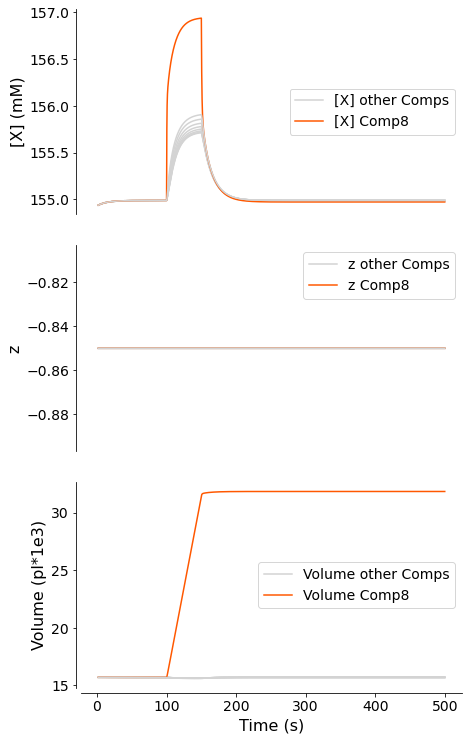

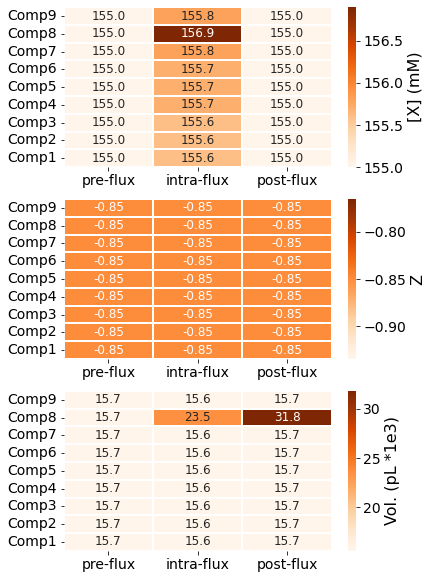

In [12]:
########################################
# GUI
########################################

btn_f1a = widgets.Button(description="Plot 1a", button_style='info')
output_f1a = widgets.Output()

display(btn_f1a, output_f1a)

global pre_t, intra_t,post_t
pre_t = 2500
intra_t = 3125
post_t = -1

########################################
# BACKEND
########################################
def btn_f1a_clicked(b):
    
    
    f1_line, [ax_x_line,ax_z_line,ax_vol_line] = mplt.subplots(3,1, figsize= (6,10),sharex=False)
    f1_heat, [ax_x_heat, ax_z_heat,ax_vol_heat] =  mplt.subplots(3,1, figsize= (6,10),sharex=False)



    f1_line.tight_layout(pad=1)
                                        
    x_heat_arr, z_heat_arr, vol_heat_arr = [],[],[]                                       
   
    for i in range(len(master_arr)):
        
        x_arr = [master_arr[i][j][7]*1e3 for j in range(len(master_arr[8]))] 
        z_arr =  [master_arr[i][j][8] for j in range(len(master_arr[8]))] 
        vol_arr = [master_arr[i][j][3]*1e15 for j in range(len(master_arr[8]))] 
        
        
        
        if i == 7:
            x_color,z_color,vol_color =  "#FF5800", "#FF5800", "#FF5800" 
            ax_x_line.plot(t_arr[50:],x_arr[50:],color = x_color,label = "[X] Comp8")
            ax_z_line.plot(t_arr[50:],z_arr[50:],color = z_color,label = "z Comp8")
            ax_vol_line.plot(t_arr[50:],vol_arr[50:],color = vol_color,label = "Volume Comp8")
        
        elif i == 1:
            x_color,z_color,vol_color = '#D3D3D3' ,'#D3D3D3' , '#D3D3D3' 
            ax_x_line.plot(t_arr[50:],x_arr[50:],color = x_color,label='[X] other Comps')
            ax_z_line.plot(t_arr[50:],z_arr[50:],color = z_color, label='z other Comps')
            ax_vol_line.plot(t_arr[50:],vol_arr[50:],color = vol_color, label='Volume other Comps')    
        else:
            x_color,z_color,vol_color = '#D3D3D3' ,'#D3D3D3' , '#D3D3D3' 
            ax_x_line.plot(t_arr[50:],x_arr[50:],color = x_color)
            ax_z_line.plot(t_arr[50:],z_arr[50:],color = z_color)
            ax_vol_line.plot(t_arr[50:],vol_arr[50:],color = vol_color)

    
        temp = [round(x_arr[pre_t],1),round(x_arr[intra_t],1),round(x_arr[post_t],1)]
        x_heat_arr.append(temp)
        temp = [round(z_arr[pre_t],2),round(z_arr[intra_t],2),round(z_arr[post_t],2)]
        z_heat_arr.append(temp)
        temp = [round(vol_arr[pre_t],1),round(vol_arr[intra_t],1),round(vol_arr[post_t],1)]
        vol_heat_arr.append(temp)
    
    ax_x_line.xaxis.set_ticks([])
    ax_x_line.spines['bottom'].set_visible(False)
    sns.despine(ax=ax_x_line,bottom = True, offset=5)
    ax_x_line.legend(loc='center right',fontsize=14)
    ax_x_line.set_ylabel("[X] (mM)",fontsize=16)
    ax_x_line.tick_params(axis='y', which='major', labelsize=14)
    
    
    ax_z_line.xaxis.set_ticks([])
    ax_z_line.spines['bottom'].set_visible(False)
    sns.despine(ax=ax_z_line,bottom =True, offset=5)
    ax_z_line.legend(loc='upper right',fontsize=14)
    ax_z_line.set_ylabel("z",fontsize=16)
    ax_z_line.tick_params(axis='y', which='major', labelsize=14)

    sns.despine(ax=ax_vol_line, offset=5)
    ax_vol_line.legend(loc='center right',fontsize=14)
    ax_vol_line.set_ylabel("Volume (pl*1e3)",fontsize=16)
    ax_vol_line.set_xlabel("Time (s)",fontsize=16)
    ax_vol_line.tick_params(axis='x', which='major', labelsize=14)
    ax_vol_line.tick_params(axis='y', which='major', labelsize=14)
    
    
    x_heat_arr.reverse()
    z_heat_arr.reverse()
    vol_heat_arr.reverse()
    heat_x_arr = ["pre-flux","intra-flux","post-flux"]
    
    g = sns.heatmap(x_heat_arr,cmap="Oranges",xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_x_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('[X] (mM)',fontsize=16)
    
    g = sns.heatmap(z_heat_arr,cmap="Oranges",xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_z_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('Z',fontsize=16)
    
    g = sns.heatmap(vol_heat_arr,cmap="Oranges",xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_vol_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('Vol. (pL *1e3)',fontsize=16)

    
########################################
# IMPLEMENTATION
########################################
btn_f1a.on_click(btn_f1a_clicked)

## F1b - ions

Button(button_style='info', description='Plot 1_ions', style=ButtonStyle())

Output()

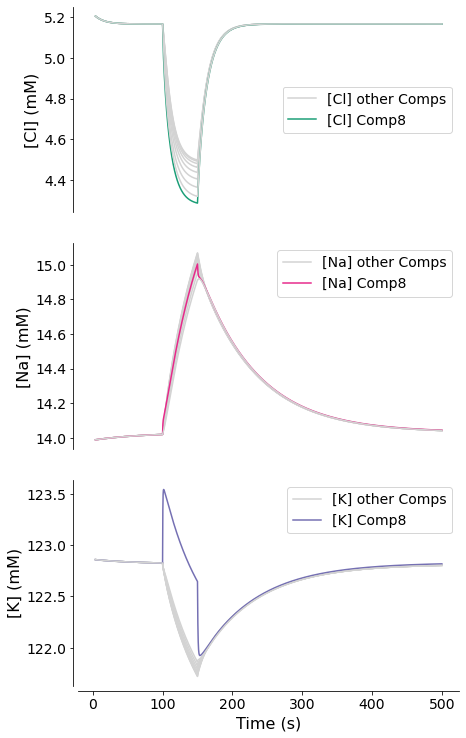

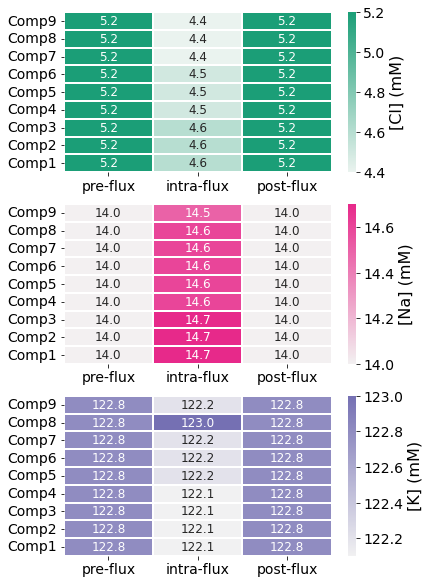

In [21]:
########################################
# GUI
########################################

btn_f1_ion = widgets.Button(description="Plot 1_ions", button_style='info')
output_f1_ion = widgets.Output()

display(btn_f1_ion, output_f1_ion)


cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
na_cmap = sns.light_palette('#e7298a', as_cmap=True)
k_cmap = sns.light_palette('#7570b3' , as_cmap=True)

########################################
# BACKEND
########################################
def btn_f1_ion_clicked(b):
    
    
    f1_line, [ax_cl_line,ax_na_line,ax_k_line] = mplt.subplots(3,1, figsize= (6,10),sharex=False)
    f1_heat, [ax_cl_heat, ax_na_heat,ax_k_heat] =  mplt.subplots(3,1, figsize= (6,10),sharex=False)



    f1_line.tight_layout(pad=1)
                                        
    na_heat_arr, cl_heat_arr, k_heat_arr = [],[],[]                                       
   
    for i in range(len(master_arr)):
        
        na_arr = [master_arr[i][j][4]*1e3 for j in range(len(master_arr[8]))] 
        k_arr =  [master_arr[i][j][5]*1e3 for j in range(len(master_arr[8]))] 
        cl_arr = [master_arr[i][j][6]*1e3 for j in range(len(master_arr[8]))] 
        
        
        
        if i == 7:
            na_color,cl_color,k_color =  '#e7298a', '#1b9e77', '#7570b3' 
            ax_cl_line.plot(t_arr[100:],cl_arr[100:],color = cl_color,label = "[Cl] Comp8")
            ax_na_line.plot(t_arr[100:],na_arr[100:],color = na_color,label = "[Na] Comp8")
            ax_k_line.plot(t_arr[100:],k_arr[100:],color = k_color,label = "[K] Comp8")
        
        elif i == 1:
            cl_color, na_color, k_color = '#D3D3D3' ,'#D3D3D3' , '#D3D3D3' 
            ax_cl_line.plot(t_arr[100:],cl_arr[100:],color = cl_color,label='[Cl] other Comps')
            ax_na_line.plot(t_arr[100:],na_arr[100:],color = na_color, label='[Na] other Comps')
            ax_k_line.plot(t_arr[100:],k_arr[100:],color = k_color, label='[K] other Comps')    
        else:
            cl_color, na_color, k_color = '#D3D3D3' ,'#D3D3D3' , '#D3D3D3' 
            ax_cl_line.plot(t_arr[100:],cl_arr[100:],color = cl_color)
            ax_na_line.plot(t_arr[100:],na_arr[100:],color = na_color)
            ax_k_line.plot(t_arr[100:],k_arr[100:],color = k_color)

    
        temp = [round(cl_arr[pre_t],1),round(cl_arr[intra_t],1),round(cl_arr[post_t],1)]
        cl_heat_arr.append(temp)
        temp = [round(na_arr[pre_t],1),round(na_arr[intra_t],1),np.trunc(na_arr[post_t])]
        na_heat_arr.append(temp)
        temp = [round(k_arr[pre_t],1),round(k_arr[intra_t],1),round(k_arr[post_t],1)]
        k_heat_arr.append(temp)
    
    ax_cl_line.xaxis.set_ticks([])
    ax_cl_line.spines['bottom'].set_visible(False)
    sns.despine(ax=ax_cl_line,bottom = True, offset=5)
    ax_cl_line.legend(loc='center right',fontsize=14)
    ax_cl_line.set_ylabel("[Cl] (mM)",fontsize=16)
    ax_cl_line.tick_params(axis='y', which='major', labelsize=14)
    
    
    ax_na_line.xaxis.set_ticks([])
    ax_na_line.spines['bottom'].set_visible(False)
    sns.despine(ax=ax_na_line,bottom =True, offset=5)
    ax_na_line.legend(loc='upper right',fontsize=14)
    ax_na_line.set_ylabel("[Na] (mM)",fontsize=16)
    ax_na_line.tick_params(axis='y', which='major', labelsize=14)

    sns.despine(ax=ax_k_line, offset=5)
    ax_k_line.legend(loc='upper right',fontsize=14)
    ax_k_line.set_ylabel("[K] (mM)",fontsize=16)
    ax_k_line.set_xlabel("Time (s)",fontsize=16)
    ax_k_line.tick_params(axis='x', which='major', labelsize=14)
    ax_k_line.tick_params(axis='y', which='major', labelsize=14)
    
    
    cl_heat_arr.reverse()
    na_heat_arr.reverse()
    k_heat_arr.reverse()
    heat_x_arr = ["pre-flux","intra-flux","post-flux"]
    
    g = sns.heatmap(na_heat_arr,cmap=na_cmap,xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_na_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('[Na] (mM)',fontsize=16)
    
    g = sns.heatmap(cl_heat_arr,cmap=cl_cmap,xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_cl_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('[Cl] (mM)',fontsize=16)
    
    g = sns.heatmap(k_heat_arr,cmap=k_cmap,xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_k_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('[K] (mM)',fontsize=16)
    
    """   
    
 
    g_lower_left = sns.heatmap(lower_left_arr,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=left_ax_lower,linewidth=0.01 )
    #g_lower_left.set_ylabel("Compartment",fontsize=10)
    g_lower_left.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    left_ax_lower.set_title("Cl- conc. ",fontsize=10)
    
    g_lower_mid = sns.heatmap(lower_mid_arr,cmap="Reds",xticklabels=False,yticklabels=False, cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=mid_ax_lower,linewidth=0.01 )
    #g_lower_mid.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    mid_ax_lower.set_title("Na+ conc. ",fontsize=10)
    
    g_lower_right = sns.heatmap(lower_right_arr,cmap="Blues",xticklabels=False,yticklabels=False,  cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=right_ax_lower, linewidth=0.01 )
    #g_lower_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    right_ax_lower.set_title("K+ conc. ",fontsize=10)

   """
    
########################################
# IMPLEMENTATION
########################################
btn_f1_ion.on_click(btn_f1_ion_clicked)

## FIGURE 1C - Comparing potentials

Button(button_style='info', description='Plot 1B', style=ButtonStyle())

Output()

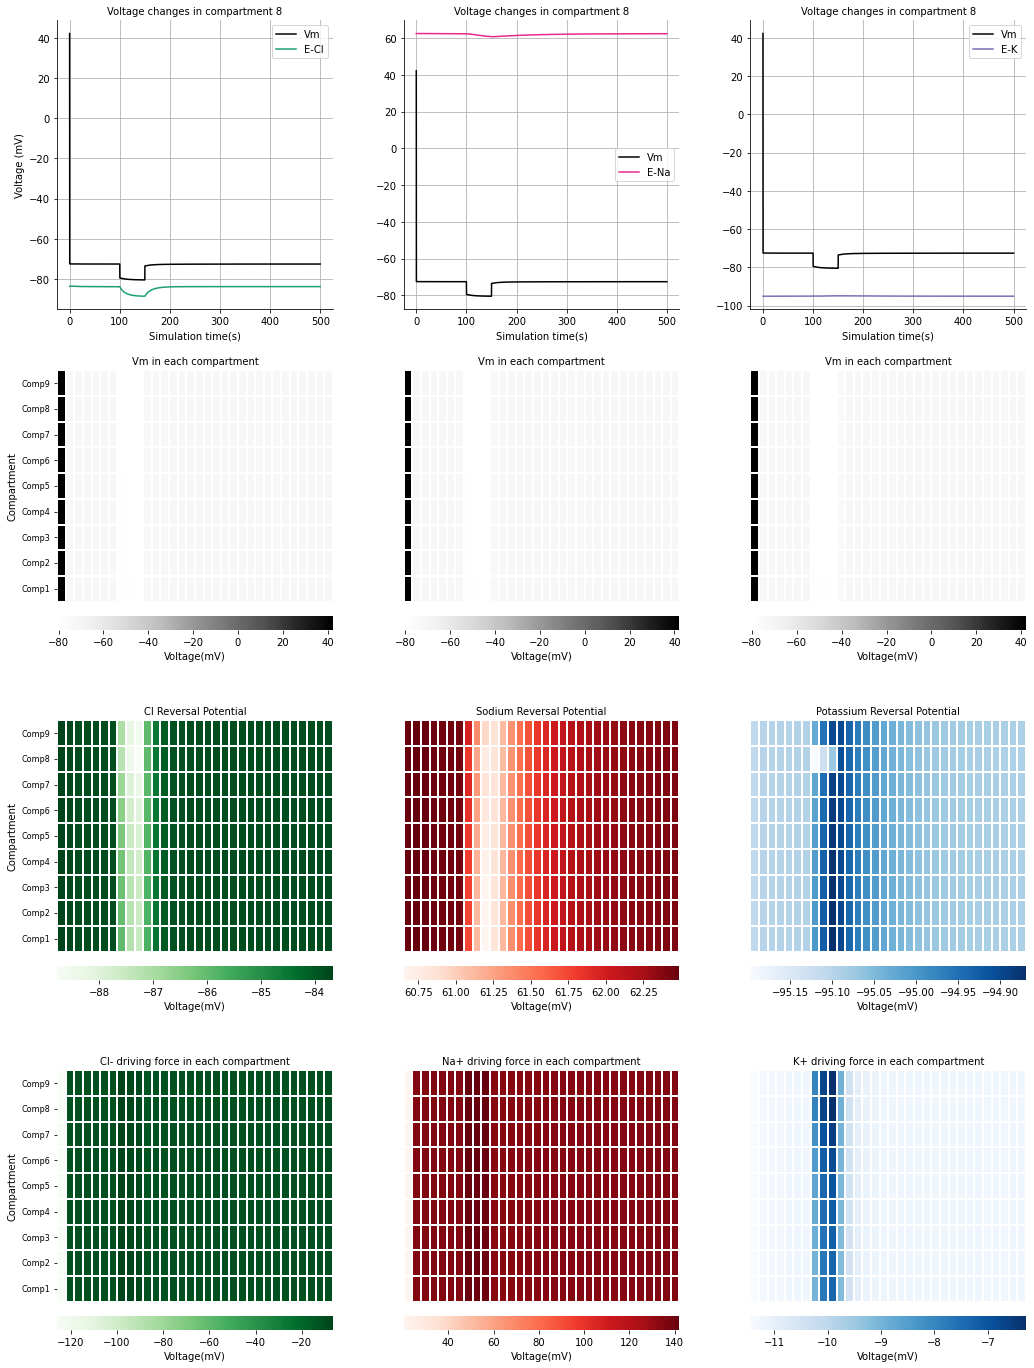

In [22]:
########################################
# GUI
########################################

btn_f1b = widgets.Button(description="Plot 1B", button_style='info')
output_f1b = widgets.Output()

display(btn_f1b, output_f1b)



########################################
# BACKEND
########################################

def btn_f1b_clicked(b):

    f1b, [(left_ax_c8, mid_ax_c8, right_ax_c8),
          (left_ax_vm,mid_ax_vm,right_ax_vm),(left_ax_ecl, mid_ax_ena, right_ax_ek), (left_ax_dfcl, mid_ax_dfna, right_ax_dfk)] = mplt.subplots(4,3, figsize=(15,20))
    f1b.tight_layout(pad=4.0)
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    x_arr = [round(t_arr[i]) for i in range(len(t_arr))]
    
    
    

    ###### COMP-8 GRAPHS
    
    
    ek_arr = [ master_arr[8][i][-2]*1e3 for i in range(len(t_arr)) ]
    ena_arr = [ (-1*RTF * np.log(master_arr[8][i][4]/145e-3))*1e3 for i in range(len(t_arr))]
    ecl_arr = [ master_arr[8][i][-1]*1e3 for i in range(len(t_arr))]
    vm_arr = [ master_arr[8][i][-3]*1e3 for i in range(len(t_arr))]
    
    left_ax_c8.plot(t_arr[:],vm_arr[:], label='Vm', color = '#000000')
    left_ax_c8.plot(t_arr[:],ecl_arr[:], label ='E-Cl', color ='#1b9e77')
    left_ax_c8.legend()
    left_ax_c8.set_ylabel("Voltage (mV)")
    left_ax_c8.set_xlabel("Simulation time(s)")
    left_ax_c8.set_title("Voltage changes in compartment 8",fontsize=10)
    left_ax_c8.grid()
    sns.despine()
    
    mid_ax_c8.plot(t_arr[:],vm_arr[:], label='Vm', color = '#000000')
    mid_ax_c8.plot(t_arr[:],ena_arr[:], label ='E-Na',color ='#e7298a')
    mid_ax_c8.legend()
    mid_ax_c8.set_xlabel("Simulation time(s)")
    mid_ax_c8.set_title("Voltage changes in compartment 8",fontsize=10)
    mid_ax_c8.grid()
    sns.despine()
    
    right_ax_c8.plot(t_arr[:],vm_arr[:], label='Vm', color = '#000000')
    right_ax_c8.plot(t_arr[:],ek_arr[:], label ='E-K',color ='#7570b3')
    right_ax_c8.legend()
    right_ax_c8.set_xlabel("Simulation time(s)")
    right_ax_c8.set_title("Voltage changes in compartment 8",fontsize=10)
    right_ax_c8.grid()
    sns.despine()
    
    
    ####### HEAT MAPS
    
    vm_arr = []
    ecl_arr_heatmap, ena_arr_heatmap, ek_arr_heatmap = [],[],[]
    cldf_arr, nadf_arr, kdf_arr = [],[],[]
    
    for i in range(len(comp_names_arr)-1,-1,-1):
        
        temp_arr_vm = [master_arr[i][j][-3]*1e3 for j in range(len(t_arr))] 
        temp_arr_vm = temp_arr_vm[::400]
        vm_arr.append(temp_arr_vm)
        
        ###########
        ecl_arr =[ master_arr[i][j][-1]*1e3 for j in range(len(master_arr[8]))]
        temp_arr_cl = ecl_arr[::400]
        ecl_arr_heatmap.append(temp_arr_cl)
        
        ena_arr =[ (-1*RTF * np.log(master_arr[i][j][4]/145e-3))*1e3 for j in range(len(master_arr[8]))]
        temp_arr_mid = ena_arr[::400]
        ena_arr_heatmap.append(temp_arr_mid)
        
        ek_arr = [ master_arr[i][j][-2]*1e3 for j in range(len(master_arr[8])) ]
        temp_arr_right = ek_arr[::400]
        ek_arr_heatmap.append(temp_arr_right)
        
        ###########
        temp_arr_df= [master_arr[i][j][-1]*1e3 - master_arr[i][j][-3]*1e3 for j in range(len(master_arr[0]))] 
        temp_arr_cl2 = temp_arr_df[::400]
        cldf_arr.append(temp_arr_cl2)
        
        temp_arr_df= [(-1*RTF * np.log(master_arr[i][j][4]/145e-3))*1e3 - master_arr[i][j][-3]*1e3 for j in range(len(master_arr[0]))] 
        temp_arr_na2 = temp_arr_df[::400]
        nadf_arr.append(temp_arr_na2)
        
        temp_arr_df = [master_arr[i][j][-2]*1e3 - master_arr[i][j][-1]*1e3 for j in range(len(master_arr[0]))] 
        temp_arr_k2 = temp_arr_df[::400]
        kdf_arr.append(temp_arr_k2)
        
        
    
    ####################
    grey_heatmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    
    g_vm_left = sns.heatmap(vm_arr,cmap="Greys",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=left_ax_vm,linewidth=0.01 )
    g_vm_left.set_ylabel("Compartment",fontsize=10)
    g_vm_left.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    left_ax_vm.set_title("Vm in each compartment",fontsize=10)    
        
    g_vm_mid = sns.heatmap(vm_arr,cmap="Greys",xticklabels=False, yticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=mid_ax_vm,linewidth=0.01 )
    #g_vm_mid.set_ylabel("Compartment",fontsize=10)
    #g_vm_mid.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    mid_ax_vm.set_title("Vm in each compartment",fontsize=10)  
    
    g_vm_right = sns.heatmap(vm_arr,cmap="Greys",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=right_ax_vm,linewidth=0.01 )
    #g_vm_right.set_ylabel("Compartment",fontsize=10)
    #g_vm_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    right_ax_vm.set_title("Vm in each compartment",fontsize=10)  
    ######################
    g_ecl_left = sns.heatmap(ecl_arr_heatmap,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=left_ax_ecl,linewidth=0.01 )
    g_ecl_left.set_ylabel("Compartment",fontsize=10)
    g_ecl_left.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    left_ax_ecl.set_title("Cl Reversal Potential",fontsize=10)
    
    g_ena_mid = sns.heatmap(ena_arr_heatmap,cmap="Reds",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=mid_ax_ena,linewidth=0.01 )
    #g_ena_mid.set_ylabel("Compartment",fontsize=10)
    #g_ena_mid.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    mid_ax_ena.set_title("Sodium Reversal Potential",fontsize=10)
    
    g_ek_right = sns.heatmap(ek_arr_heatmap,cmap="Blues",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=right_ax_ek,linewidth=0.01 )
    #g_ek_right.set_ylabel("Compartment",fontsize=10)
    #g_ek_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    right_ax_ek.set_title("Potassium Reversal Potential",fontsize=10)
    ########################
    
    g_cldf = sns.heatmap(cldf_arr,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=left_ax_dfcl,linewidth=0.01 )
    g_cldf.set_ylabel("Compartment",fontsize=10)
    g_cldf.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    left_ax_dfcl.set_title("Cl- driving force in each compartment",fontsize=10)
    
    g_nadf = sns.heatmap(nadf_arr,cmap="Reds",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=mid_ax_dfna,linewidth=0.01 )
    #g_lower_mid.set_ylabel("Compartment",fontsize=10)
    #g_lower_mid.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    mid_ax_dfna.set_title("Na+ driving force in each compartment",fontsize=10)
    
    g_kdf = sns.heatmap(kdf_arr,cmap="Blues",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=right_ax_dfk, linewidth=0.01 )
    #g_lower_right.set_ylabel("Compartment",fontsize=10)
    #g_lower_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    right_ax_dfk.set_title("K+ driving force in each compartment",fontsize=10)
    ###########################


# IMPLEMENTATION
########################################

btn_f1b.on_click(btn_f1b_clicked)

Button(button_style='info', description='Plot 1c line graphs', style=ButtonStyle())

Output()

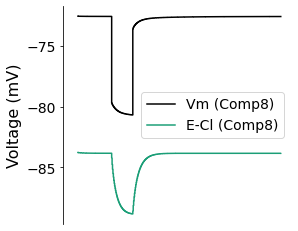

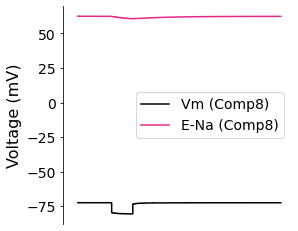

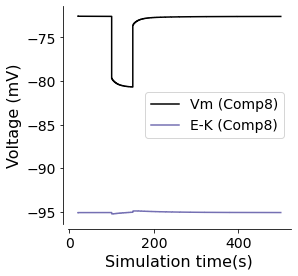

In [10]:
########################################
# GUI
########################################

btn_f1c = widgets.Button(description="Plot 1c line graphs", button_style='info')
output_f1c = widgets.Output()

display(btn_f1c, output_f1c)

sns.reset_orig()

pre_t = 1190
intra_t = 1870
post_t = -1


########################################
# BACKEND
########################################

def btn_f1c_clicked(b):

    cl_graph, ax_cl = mplt.subplots(1,1, figsize=(4,4))
    na_graph, ax_na = mplt.subplots(1,1, figsize=(4,4))
    k_graph,ax_k = mplt.subplots(1,1, figsize=(4,4)) 
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    x_arr = [round(t_arr[i]) for i in range(len(t_arr))]
    
    ###### COMP-8 GRAPHS
    
    ek_arr = [ master_arr[7][i][-2]*1e3 for i in range(len(master_arr[8])) ]
    ena_arr = [ (-1*RTF * np.log(master_arr[7][i][4]/145e-3))*1e3 for i in range(len(master_arr[8]))]
    ecl_arr = [ master_arr[7][i][-1]*1e3 for i in range(len(master_arr[8])) ]
    vm_arr = [ master_arr[7][i][-3]*1e3 for i in range(len(master_arr[8])) ]
    
    ax_cl.plot(x_arr[500:],vm_arr[500:], label='Vm (Comp8)', color = '#000000')
    ax_cl.plot(x_arr[500:],ecl_arr[500:], label ='E-Cl (Comp8)', color ='#1b9e77')
    ax_cl.legend(fontsize=14, loc = 'center right')
    ax_cl.xaxis.set_ticks([])
    ax_cl.tick_params(axis='y', which='major', labelsize=14)
    ax_cl.set_ylabel("Voltage (mV)",fontsize=16)
    sns.despine(ax=ax_cl,bottom=True,offset=5)
    
    ax_na.plot(x_arr[500:],vm_arr[500:], label='Vm (Comp8)', color = '#000000')
    ax_na.plot(x_arr[500:],ena_arr[500:], label ='E-Na (Comp8)',color ='#e7298a')
    ax_na.legend(fontsize=14)
    ax_na.xaxis.set_ticks([])
    ax_na.xaxis.set_tick_params(labelsize=12)
    ax_na.tick_params(axis='y', which='major', labelsize=14)
    ax_na.set_ylabel("Voltage (mV)",fontsize=16)
    sns.despine(ax=ax_na,bottom=True,offset=5)
    
    ax_k.plot(x_arr[500:],vm_arr[500:], label='Vm (Comp8)', color = '#000000')
    ax_k.plot(x_arr[500:],ek_arr[500:], label ='E-K (Comp8)',color ='#7570b3')
    ax_k.legend(fontsize=14)
    ax_k.set_ylabel("Voltage (mV)",fontsize=16)
    ax_k.set_xlabel("Simulation time(s)",fontsize=16)
    ax_k.tick_params(axis='y', which='major', labelsize=14)
    ax_k.tick_params(axis='x', which='major', labelsize=14)
    sns.despine(ax=ax_k,bottom=False,offset=5)
   
    cl_graph.savefig('cl_line_graph.jpeg', bbox_inches='tight',dpi=600)
    na_graph.savefig('na_line_graph.jpeg', bbox_inches='tight',dpi=600)
    k_graph.savefig('k_line_graph.jpeg', bbox_inches='tight',dpi=600)
    
# IMPLEMENTATION
########################################

btn_f1c.on_click(btn_f1c_clicked)

In [23]:
########################################
# GUI
########################################

btn_f1c_heat = widgets.Button(description="Plot 1c heatmaps", button_style='info')
output_f1c_heat = widgets.Output()

display(btn_f1c_heat, output_f1c_heat)

sns.reset_orig()

cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
na_cmap = sns.light_palette('#e7298a', as_cmap=True)
k_cmap = sns.light_palette('#7570b3' , as_cmap=True)

########################################
# BACKEND
########################################

def btn_f1c_heat_clicked(b):

    f2_cl, ([ax_vm1,ax_ecl,ax_dfcl]) = mplt.subplots(1,3, figsize=(14,4))
    f2_cl.tight_layout(pad=3)
    f2_na, ([ax_vm2,ax_ena,ax_dfna])= mplt.subplots(1,3, figsize=(14,4))
    f2_na.tight_layout(pad=3)
    f2_k, ([ax_vm3,ax_ek,ax_dfk]) = mplt.subplots(1,3, figsize=(14,4))
    f2_k.tight_layout(pad=3)
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    x_arr = [round(t_arr[i]) for i in range(len(t_arr))]
    
       
    
    ####### HEAT MAPS
    

    vm_arr = []
    ecl_arr, ena_arr, ek_arr = [],[],[]
    cldf_arr, nadf_arr, kdf_arr = [],[],[]
    

    for i in range(len(comp_names_arr)):
        
        vm = [round(master_arr[i][j][-3]*1e3,1) for j in range(len(master_arr[0]))] 
        temp = [vm[pre_t],vm[intra_t],vm[post_t]]
        vm_arr.append(temp)
        
        ## Cl
        ecl = [round(master_arr[i][j][-1]*1e3,1) for j in range(len(master_arr[0]))] 
        temp = [ecl[pre_t],ecl[intra_t],ecl[post_t]]
        ecl_arr.append(temp)
        
        temp = [round(vm[pre_t]-ecl[pre_t],1),round(vm[intra_t]-ecl[intra_t],1),round(vm[post_t]-ecl[post_t],1)]
        cldf_arr.append(temp)
        
        ## Na
        ena = [round(-1*RTF * np.log(master_arr[i][j][4]/145e-3)*1e3,1) for j in range(len(master_arr[8]))]
        
        temp = [ena[pre_t], ena[intra_t], ena[post_t]]
        ena_arr.append(temp)
        print(temp)
        
        temp = [round(vm[pre_t]-ena[pre_t],2),round(vm[intra_t]-ena[intra_t],2),round(vm[post_t]-ena[post_t],2)]
        nadf_arr.append(temp)
        
        ## K
        ek = [round(master_arr[i][j][-2]*1e3,1) for j in range(len(master_arr[0]))] 
        temp = [ek[pre_t],ek[intra_t],ek[post_t]]
        ek_arr.append(temp)
        
        temp = [round(vm[pre_t]-ek[pre_t],1),round(vm[intra_t]-ek[intra_t],1),round(vm[post_t]-ek[post_t],1)]
        kdf_arr.append(temp)
    
    vm_arr.reverse()
    ecl_arr.reverse()
    cldf_arr.reverse()
    ena_arr.reverse()
    nadf_arr.reverse()
    ek_arr.reverse()
    kdf_arr.reverse()
        
    
    ####################
    grey_heatmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    
    xlabel_arr =["Pre-flux","Intra-flux","Post-flux"]
    comp_names_arr_r = comp_names_arr[::-1]
    
    g_vm = sns.heatmap(vm_arr,cmap="Greys",yticklabels=True, xticklabels=True,annot=True,annot_kws={"size":12},fmt="",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_vm1,linewidth=0.01 )
    g_vm.set_yticklabels(comp_names_arr_r, fontsize=14, rotation=0) 
    g_vm.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_vm.set_title("Membrane Potential",fontsize=16)
    cbar = g_vm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_ecl = sns.heatmap(ecl_arr,cmap=cl_cmap,xticklabels=True,yticklabels=False, annot=True,annot_kws={"size":12},fmt="" , cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_ecl,linewidth=0.01 )   
    g_ecl.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_ecl.set_title("Cl Reversal Potential",fontsize=16)
    cbar = g_ecl.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_cldf = sns.heatmap(cldf_arr,cmap=cl_cmap,xticklabels=True, yticklabels=False, annot=True,annot_kws={"size":12},fmt="" ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_dfcl,linewidth=0.01 )
    g_cldf.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_cldf.set_title("Cl Driving Force",fontsize=16)
    cbar = g_cldf.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_vm = sns.heatmap(vm_arr,cmap="Greys",yticklabels=True, xticklabels=True,annot=True,annot_kws={"size":12},fmt="",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_vm2,linewidth=0.01 )
    g_vm.set_yticklabels(comp_names_arr_r, fontsize=14, rotation=0) 
    g_vm.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_vm.set_title("Membrane Potential",fontsize=16)
    cbar = g_vm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_ena = sns.heatmap(ena_arr,cmap=na_cmap,xticklabels=True, yticklabels=False,  annot=True,annot_kws={"size":12},fmt=""  ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_ena,linewidth=0.01 )
    g_ena.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_ena.set_title("Na Reversal Potential",fontsize=16)
    cbar = g_ena.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_nadf = sns.heatmap(nadf_arr,cmap=na_cmap,xticklabels=True, yticklabels=False, annot=True,annot_kws={"size":12},fmt=""  ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_dfna,linewidth=0.01 )
    g_nadf.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_nadf.set_title("Na Driving Force",fontsize=16)
    cbar = g_nadf.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_vm = sns.heatmap(vm_arr,cmap="Greys",yticklabels=True, xticklabels=True,annot=True,annot_kws={"size":12},fmt="",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_vm3,linewidth=0.01 )
    g_vm.set_yticklabels(comp_names_arr_r, fontsize=14, rotation=0)
    g_vm.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_vm.set_title("Membrane Potential",fontsize=16)
    cbar = g_vm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_ek = sns.heatmap(ek_arr,cmap=k_cmap,xticklabels=True, yticklabels=False,  annot=True,annot_kws={"size":12},fmt=""  ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_ek,linewidth=0.01 )
    g_ek.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    g_ek.set_title("K Reversal Potential",fontsize=16)
    cbar = g_ek.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g_kdf = sns.heatmap(kdf_arr,cmap=k_cmap,xticklabels=True, yticklabels=False, annot=True,fmt="",annot_kws={"size":12} ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_dfk,linewidth=0.01 )
    g_kdf.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    g_kdf.set_title("K Driving Force",fontsize=16)
    cbar = g_kdf.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    #f2_cl.savefig('cl_tm_heatmaps.jpeg', bbox_inches='tight',dpi=600)
    #f2_na.savefig('na_tm_heatmaps.jpeg', bbox_inches='tight',dpi=600)
    #f2_k.savefig('k_tm_heatmaps.jpeg', bbox_inches='tight',dpi=600)
    

# IMPLEMENTATION
########################################

btn_f1c_heat.on_click(btn_f1c_heat_clicked)

Button(button_style='info', description='Plot 1c heatmaps', style=ButtonStyle())

Output()

[62.4, 61.2, 62.4]
[62.4, 61.2, 62.4]
[62.4, 61.2, 62.4]
[62.4, 61.3, 62.4]
[62.4, 61.3, 62.4]
[62.4, 61.4, 62.4]
[62.4, 61.4, 62.4]
[62.4, 61.3, 62.4]
[62.4, 61.5, 62.4]
